## Intro to the Dataset


Air Quality Index is measured with a variety of variables one of which is PM2.5. This means the density of particulate matter in the air measuring 2.5 or less micrometers. This is much less than the size of a singular human hair (50-70 microns). At this size, the particulate matter (pm25 in the dataset) can be inhaled and can cause a variety of health issues primarily in infants, children, the elderly and those with preexisiting heart or respitory issues. Having an idea of the particulate matter in the air can help officials and NGOs plan for hte health of a populace.

Source of the Dataset: [Open Africa Lagos Air Pollution Data](https://open.africa/dataset/lagos-air-pollution-data/resource/68b430bc-e10b-454b-8f2e-e47215478462)

In [1]:
#Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
path = ('C:/Users/karis/Downloads/LagosAQI/Air Quality Data Lagos.csv')

In [3]:
laqi = pd.read_csv(path)
laqi.head()

,date,pm25
0,2023/4/1,64
1,2023/4/2,53
2,2023/4/3,60
3,2023/4/4,98
4,2023/1/2,345


The dates seem to be going backwards in time at the month section (ie from April to January)

In [4]:
#Observing More of the Top to Confirm my Theory 
laqi.head(10)

,date,pm25
0,2023/4/1,64
1,2023/4/2,53
2,2023/4/3,60
3,2023/4/4,98
4,2023/1/2,345
5,2023/1/3,328
6,2023/1/4,475
7,2023/1/12,1
8,2023/1/13,1
9,2023/1/17,200


In [5]:
#then Checking the Bottom
laqi.tail()

,date,pm25
660,2021/3/26,83
661,2021/3/28,120
662,2021/3/29,132
663,2021/3/30,148
664,2021/3/31,149


The dates go from Early April 2023 but start in 2021, probably March but the way the dates are going is unusual. The first five move backwards but the 2021 dates aren't adhering to even backwards chronological order. So, flipping the data from won't helpas the earliest date of record won't be the first

In [6]:
#Check the data types
laqi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 665 entries, 0 to 664
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    665 non-null    object
 1   pm25    665 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 10.5+ KB


In [7]:
laqi.isnull().sum()

date    0
pm25    0
dtype: int64

In [8]:
laqi.describe()

,pm25
count,665.000000
mean,98.314286
std,56.025991
min,1.000000
25%,60.000000
50%,90.000000
75%,129.000000
max,475.000000


Fair to Good PM2.5 Density averaged over 24 hours should be less than 25.

In [9]:
Fair_AQI = laqi.loc[laqi['pm25'] < 25]
numofdays = (len(Fair_AQI))
totalrecord = laqi.shape[0]

percent = (numofdays/totalrecord) * 100
percent = round(percent,2)
print(f"The Particulate Matter Density was fair or good on {percent}% of recorded days")

The Particulate Matter Density was fair or good on 3.76% of recorded days


In [10]:
#Date Conversion Libraries
from datetime import datetime
from datetime import date

In [11]:
#Convert to date type so I can organize
laqi['date'] = pd.to_datetime(laqi['date'], format = 'mixed')
pd.set_option("display.date_dayfirst", True)

#Check if it worked
print(laqi.head())
print(laqi.tail())
print(laqi.info())



        date  pm25
0 2023-04-01    64
1 2023-04-02    53
2 2023-04-03    60
3 2023-04-04    98
4 2023-01-02   345
          date  pm25
660 2021-03-26    83
661 2021-03-28   120
662 2021-03-29   132
663 2021-03-30   148
664 2021-03-31   149
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 665 entries, 0 to 664
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    665 non-null    datetime64[ns]
 1   pm25    665 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 10.5 KB
None


In [12]:
#This is where the dataframe should start from
laqi['date'].min()

Timestamp('2021-01-04 00:00:00')

In [13]:
#This is where is should end
laqi['date'].max()

Timestamp('2023-04-04 00:00:00')

In [14]:
data = laqi.sort_values(by='date')

print(data.head())
print(data.tail())

          date  pm25
579 2021-01-04    98
580 2021-01-05    98
581 2021-01-06    80
582 2021-01-07    92
583 2021-01-08    65
         date  pm25
36 2023-03-31    73
0  2023-04-01    64
1  2023-04-02    53
2  2023-04-03    60
3  2023-04-04    98


Hallelujah

In [15]:
data.nunique()

date    665
pm25    172
dtype: int64

This means at least all the dates are unqiue even if several dates record the same PM2.5

## Time to Graph

[Text(0.5, 1.0, 'Lagos Particulate Matter 2.5 Micrometers or Less: January 2021 - April 2023'),
 Text(0.5, 0, 'Date'),
 Text(0, 0.5, 'Particulate Matter (2.5)')]

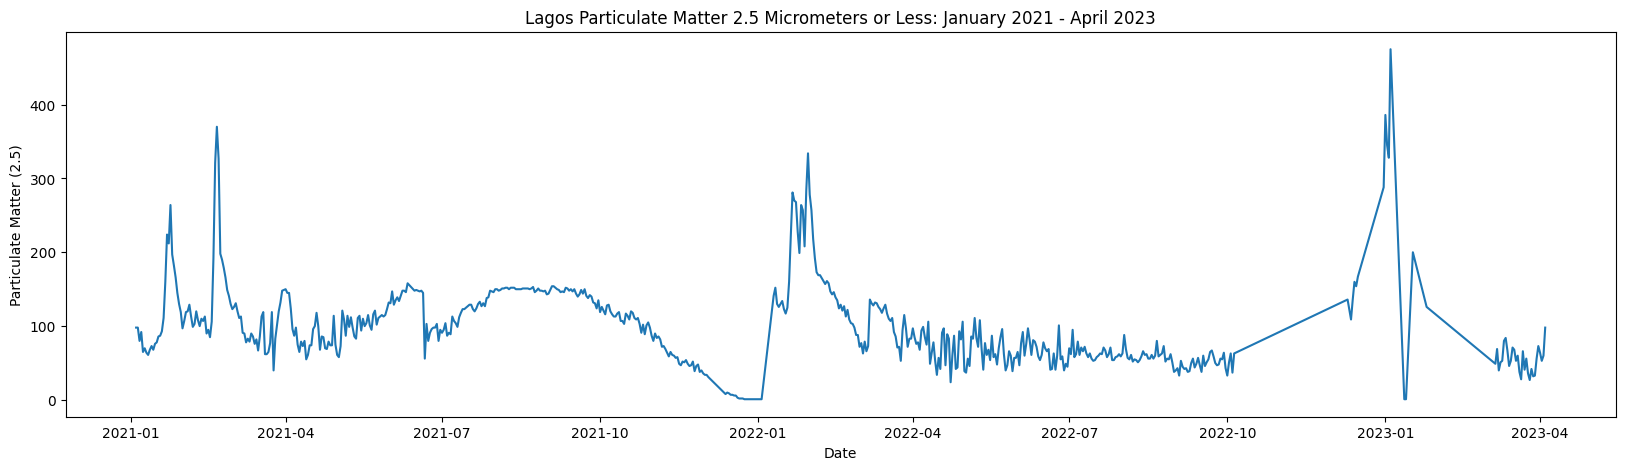

In [16]:
fig = plt.subplots(figsize=(20,5))
sns.lineplot(x = 'date', y = 'pm25', data = data).set(title='Lagos Particulate Matter 2.5 Micrometers or Less: January 2021 - April 2023', xlabel = 'Date', ylabel = 'Particulate Matter (2.5)')